In [1]:
import torch
import matplotlib.pyplot as plt

from vqvae import VQVAE

import src.metrics as metrics
from script import get_dataloader

# Reload python packages when changed
%load_ext autoreload
%autoreload 2

# Matplotlib defaults
plt.rcParams.update({
    "font.size": 25,
    "figure.figsize": (25, 5)
})

In [5]:
class args:
    batch_size=16
    num_workers=4

N_CODEBOOK = 256
DIM_CODEBOOK = 32

channel_sizes = [16, 32, 32, DIM_CODEBOOK]
strides = [2, 2, 1, 1]

In [16]:
dataloader_val = get_dataloader(args, train=False)

Files already downloaded and verified


In [17]:
model = VQVAE(
    in_channel=3,
    channel_sizes=channel_sizes,
    n_codebook=N_CODEBOOK,
    dim_codebook=DIM_CODEBOOK,
    strides=strides,
)
model.load_state_dict(torch.load("model.pt"))

<All keys matched successfully>

## Reconstructions

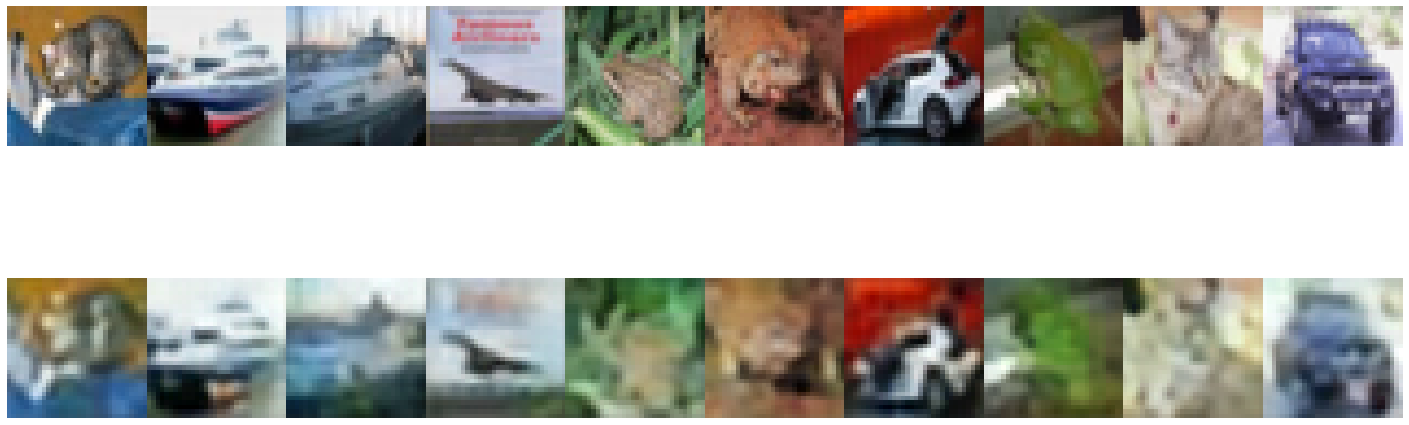

In [18]:
n_images = 10

for images, labels in dataloader_val:
    break
images = images[:n_images]
with torch.no_grad():
    reconstructions = model(images).clip(0, 1)
    
# fig, axes = plt.subplots(nrows=2, ncols=n_images)
fig = plt.figure(figsize=(25, 10))
for idx, (image, reconstruction) in enumerate(zip(images, reconstructions)):
    plt.subplot(2, n_images, idx+1)
    plt.imshow(image.permute(1, 2, 0))
    plt.axis("off")
    
    plt.subplot(2, n_images, n_images+idx+1)
    plt.imshow(reconstruction.permute(1, 2, 0))
    plt.axis("off")

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [20]:
print(f"L2:\t{metrics.reconstruction(model, dataloader_val)}")
print(f"Rank:\t{metrics.rank(model, dataloader_val)*100}%")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 11.90it/s]


L2:	0.006639342755079269


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.02it/s]

Rank:	81.91963958740234%
